In [1]:
import pandas as pd
from IPython.display import clear_output
from TextAnalysis.comments_extractor import comments_extractor
from TextAnalysis.preprocessor import TextPreprocessor
from TextAnalysis.descriptive_statistics import word_length_distribution, calculate_word_statistics, plot_most_frequent_words
from TextAnalysis.words_replacing import WordReplacer
from TextAnalysis.stem_and_lem  import TextStemLem
from TextAnalysis.pre_prepocessing import hash_text, change_time_format
from TextAnalysis.word_mapping import word_mapping
from TextAnalysis.sentiment_analysis_over_time import analyze_sentiment

clear_output()

---

# Exctraction of comments using Reddit API

In [ ]:
# Two distinct dataframes are created. It takes a few minute to extract all comments, 
# so consider making tea in the meantime

comments_after_win = comments_extractor('ACMilan', '17pzwvv') 
comments_after_lose = comments_extractor('ACMilan', '17gb1xz')

In [2]:
comments_after_lose = pd.read_csv('milan_lost.csv')
comments_after_win = pd.read_csv('milan_win.csv')

You can check that everything is ok just by writing the name(s) of a DataFrame and running the code. Before that, however, I want to apply two functions that allow me to present the better version of the data:
- I want to hash the names of people leaving commets
- change the date_time representation so that it is more user-friendly

To do so, I use functions from the "pre_preprocessing" module from the TextAnalysis Folder.

In [3]:
# Firstly I hash the 'author' columns in both dataframes
comments_after_win = hash_text(comments_after_win,column_name='author')
comments_after_lose = hash_text(comments_after_lose,column_name='author')

# Then I change the format of the representation of date and time
comments_after_win = change_time_format(comments_after_win,column_name='created_utc')
comments_after_lose = change_time_format(comments_after_lose,column_name='created_utc')

---

### The DataFrames afrer pre_prepocessing:

In [ ]:
comments_after_lose.head(5)

In [ ]:
comments_after_win.head(5)

 If you do not want to run the same command over and over again, consider downloading data 
to a csv file and name it the way you like. After that just assign in to a variable. For example:

```py
comments_after_lose.to_csv('milan_lost.csv', index=False)
sad_comments = pd.read_csv('milan_lost.csv')
```

I will continue with the previous name.

---

# Preprocessing Stage

#### Now we use quite a few function to preprocess data
Consult with the "preprocessor", "words_replacing"and "stem_and_lem" modules in the TextAnalysis folder. All the documentation is written there.

After the execution of the comments we expect the text to be:
- In lower case;
- Without any links;
- Without punctuation;
- Without stopwords (words that don't have much meaning);
- Without any special characters;
- Contaning only words with more than 2 letters (to avoid nonsense words that might appear during previous stages);
- With curse words masked;
  
Additionally, I manually replace some of the words as long as they refer to the same thing(person) but are treated differently when analyzing data. Mainly, it concerns surnames of the players. For example, Christian Pulisic can be addressed by "Puli" and "Pulisich" by the fans of Milan; or "RCL" is a "Ruben Loftus-Cheek". No python library can trace it, so I have to manually change it if I notice something. It can surely impact the analysis of the comments, but there is no recearch withou limitations.  For that, I use "words_replacing" module in the TextAnalysis folder.

Lastly, I want to add two columns to the dataframe: one with stemmed words and another with lemmatized words. Those are nedded as I want to compare text of I receive after preprocessing with even "purer" data to have just a better view of the situation. For that, I use "stem_and_lem" module in the TextAnalysis folder.

We have to make instances of the class TextProcessor to apply all the functions:

In [4]:
preprocessor_lose = TextPreprocessor(comments_after_lose)
preprocessor_win = TextPreprocessor(comments_after_win)

After that we create dataframes out of the instances:

In [5]:
# body -- the name of the column that contains the text of the comments
preprocessed_lose_df = preprocessor_lose.apply_all('body')
preprocessed_win_df = preprocessor_win.apply_all('body')

Now we can look what we get:

In [ ]:
preprocessed_lose_df.head(5)

In [ ]:
preprocessed_win_df.head(5)

Now let's turn to the replacement of the word that refer to the same person:

In [6]:
# We firstly create two instances of the WordReplacer class
word_replacer_win = WordReplacer(preprocessed_win_df)
word_replacer_lose = WordReplacer(preprocessed_lose_df)

#Then we create two dataframes (I name them the same way to avoid the confusion)
# and we use the dictionary 'word_mapping' from the respective module.
preprocessed_win_df = word_replacer_win.replace_words('body', word_mapping)
word_replacer_lose = word_replacer_lose.replace_words('body', word_mapping)

In [ ]:
preprocessed_win_df.head(5) #It works, as we have "leao" instead of "rafa".

##### Now we can proceede with adding columns with stemmed and lemmatized words:

In [7]:
%%capture

# We firstly create two instances of the TextStemLem class:
tsl_w = TextStemLem(preprocessed_win_df)
tsl_l = TextStemLem(preprocessed_lose_df)

# Then we add a column with stemmed words
tsl_w.stem_words('body')
tsl_l.stem_words('body')

# Finally, we add a column with lemmatized words
tsl_w.lemmatize_words('body')
tsl_l.lemmatize_words('body')

In [8]:
preprocessed_win_df = tsl_w.dataframe
preprocessed_lose_df = tsl_l.dataframe

In [ ]:
preprocessed_win_df.head(5) # As you can see, everything works
# and we are done with the preprocessing part

---

# Descriptive Statistics

To get the descriptive statistics, I use functions from the "descriptive_statistics" module in the TextAnalysis folder.
There are three functions:

1) word_length_distribution: It returns histograms with the distribution of words in columns
2) calculate_word_statistics: It returns a DataFrame with the statistics about the words (total number of words, number of unique words, average length, median word lenght)
3) plot_most_frequent_words: It returns histograms with the most frequently used words (number is arbitrary, by default it is 10

As long as I apply this function to the columns 'body', 'stemmed_words', and 'lemmatized_words', there should be a list of them to apply functions simultanitously. 

In [9]:
# create a list
columns_list = ['body', 'stemmed_words', 'lemmatized_words']

In [ ]:
word_length_distribution(preprocessed_win_df, columns_list,figsize=(5,8))

In [ ]:
calculate_word_statistics(preprocessed_win_df, columns_list)

In [ ]:
plot_most_frequent_words(preprocessed_win_df,columns_list)

---

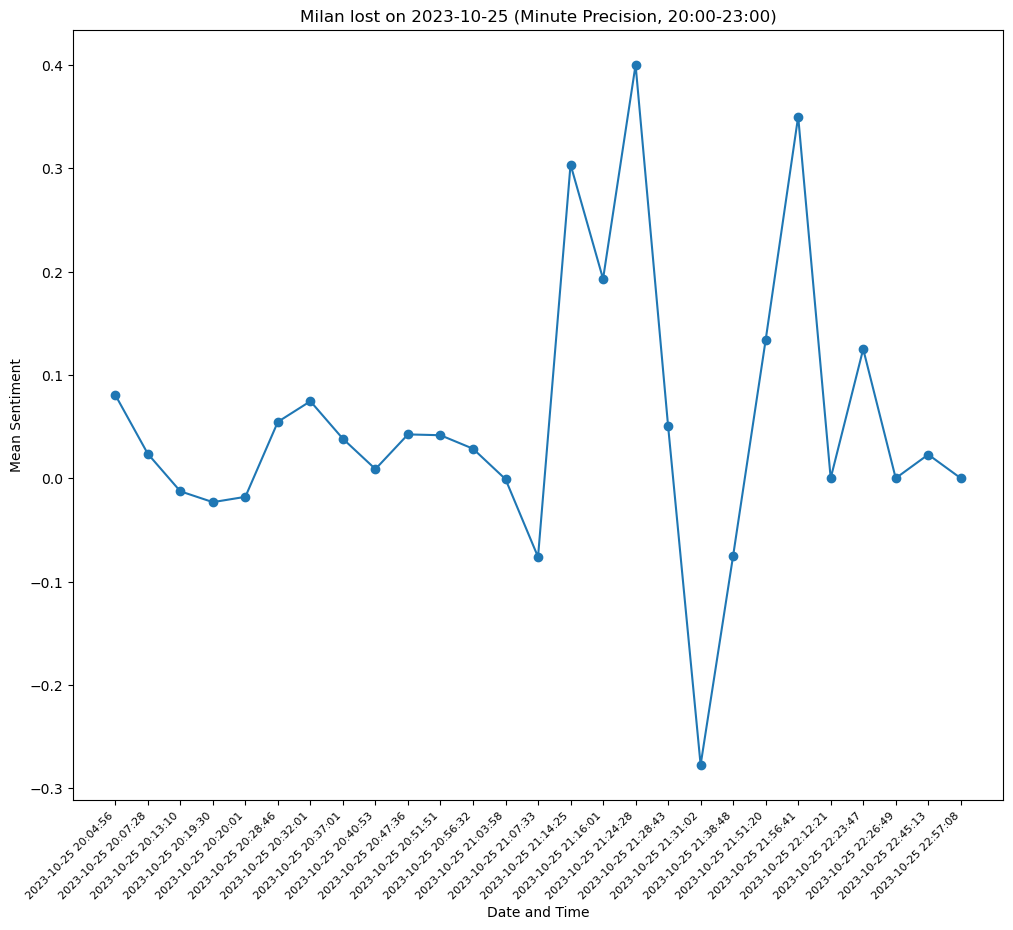

In [12]:
# Assuming your DataFrame is named 'preprocessed_win_df'
# Replace 'YourColumnName' with the actual column names in your DataFrame

# Use the function with your specific parameters
analyze_sentiment(preprocessed_lose_df, '2023-10-25', 20, 23, interval_minutes=5)

In [ ]:
preprocessed_lose_df['created_datetime'] = pd.to_datetime(preprocessed_lose_df['created_datetime'])

nov_7_data = preprocessed_lose_df[
    (preprocessed_lose_df['created_datetime'].dt.date == pd.to_datetime('2023-10-25').date()) &
    (preprocessed_lose_df['created_datetime'].dt.hour >= 20) &
    (preprocessed_lose_df['created_datetime'].dt.hour < 23)
]

nov_7_data = nov_7_data.assign(sentiment=nov_7_data['body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity))

minute_sentiment = nov_7_data.groupby(
    [nov_7_data['created_datetime'].dt.hour, (nov_7_data['created_datetime'].dt.minute // 5) * 5],
    as_index=False
).agg({'sentiment': 'mean', 'created_datetime': 'first'})

minute_sentiment['combined_datetime'] = minute_sentiment['created_datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

plt.figure(figsize=(12, 10))
plt.plot(minute_sentiment['combined_datetime'], minute_sentiment['sentiment'], marker='o')
plt.title('Sentiment Analysis on the 7th of November 2023 (Minute Precision)')
plt.xlabel('Date and Time')
plt.ylabel('Mean Sentiment')
plt.xticks(rotation=45)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()